### Imports

In [1]:
import numpy as np
import pandas as pd

### Carregando os dados em um quadro de dados com Pandas

In [2]:
#df é de "data frame", o nome tem que ser exatamente do arquivo csv com os dados
df=pd.read_csv("agricultural_raw_material.csv")

### Explorando os dados

In [3]:
#as principais colunas e alguns exemplos dos dados presentes no arquivo
df.info

<bound method DataFrame.info of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      

In [4]:
#mostra a quantidade de registros nulos
df.info
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

In [5]:
#fazendo replace de %, "," e "-" // o np.nan transforma em nulo, aquele "MAY90" é irrelevante, é só um dado que tava dando pau
df = df.replace("%", "", regex=True)
df = df.replace(",", "", regex=True)
df = df.replace("-", "", regex=True)
df = df.replace("", np.nan)
df = df.replace("MAY90", np.nan)

#apagando valores nulos
df = df.dropna()

#novamente checando qt de registros nulos
df.isnull().sum()

#convertendo tipos de dado para float
lst = ["Coarse wool Price", "Coarse wool price % Change", "Copra Price", "Copra price % Change", "Cotton price % Change","Fine wool Price", "Fine wool price % Change", "Hard log price % Change", "Hard sawnwood price % Change", "Hide price % change", "Plywood price % Change", "Rubber price % Change", "Softlog price % Change", "Soft sawnwood price % Change", "Wood pulp price % Change"]
df[lst] = df[lst].astype("float")
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [6]:
#traz um top 5 das colunas
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
1,May90,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [7]:
#formatando data
#essa primeira linha foi necessaria pois month estava em indice e não em coluna
df = df.reset_index()
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
df = df.set_index('Month')

df.head()

,index,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-05-01,1,447.26,7.27,234.0,0.85,1.89,3.28,1057.18,1.35,172.86,...,350.12,12.09,0.85,1.19,124.28,3.00,213.00,2.63,842.51,1.59
1990-06-01,2,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,3,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,4,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,5,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87


In [8]:
#mostra colunas
print(df.columns)

Index(['index', 'Coarse wool Price', 'Coarse wool price % Change',
       'Copra Price', 'Copra price % Change', 'Cotton Price',
       'Cotton price % Change', 'Fine wool Price', 'Fine wool price % Change',
       'Hard log Price', 'Hard log price % Change', 'Hard sawnwood Price',
       'Hard sawnwood price % Change', 'Hide Price', 'Hide price % change',
       'Plywood Price', 'Plywood price % Change', 'Rubber Price',
       'Rubber price % Change', 'Softlog Price', 'Softlog price % Change',
       'Soft sawnwood Price', 'Soft sawnwood price % Change',
       'Wood pulp Price', 'Wood pulp price % Change'],
      dtype='object')


In [9]:
#mostra indices
print(df.index.names)

['Month']


### Mapa de calor

In [10]:
#imports
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

#comando que garante que o grafico apareça direto aqui e não em outra janela
%matplotlib inline

#está configurado o estilo visual dos gráficos. O estilo 'darkgrid' adiciona uma grade de fundo com um tema escuro nos gráficos, tornando a visualização dos dados mais atraente.
#Outros estilos incluem 'whitegrid', 'dark', 'white'
sns.set_style('darkgrid')

#ajusta o tamanho da fonte nos gráficos gerados
matplotlib.rcParams['font.size'] = 14

#define o tamanho padrão da figura, em polegadas
matplotlib.rcParams['figure.figsize'] = (9, 5)

#define a cor de fundo da figura (gráfico). O valor '#00000000' representa uma cor preta (hexadecimal #000000) com total transparência (os dois últimos zeros representam o alfa, que controla a opacidade).
matplotlib.rcParams['figure.facecolor'] = '#00000000'

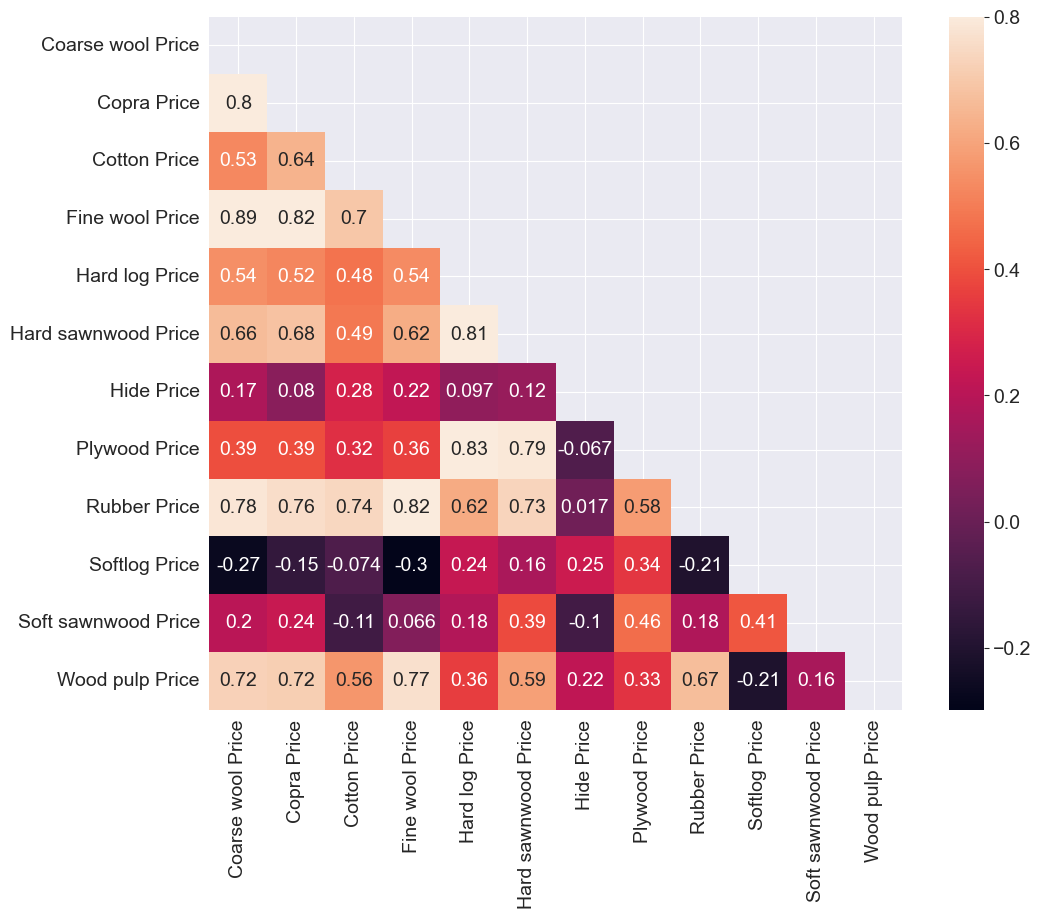

In [11]:
#nomes das colunas que estarão no mapa
raw_data=['Coarse wool Price',  'Copra Price','Cotton Price', 'Fine wool Price',  'Hard log Price', 'Hard sawnwood Price',
 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price', 'Soft sawnwood Price', 'Wood pulp Price']

#correlação, para ver se algum item se relaciona com o outro
corrmat = df[raw_data].corr()

#tamanho
fig = plt.figure(figsize = (12, 9))

#cria uma mascara para esconder ocultar os valores repetidos (como pode observar o gráfico é uma "escadinha")
mask = np.triu(np.ones_like(corrmat, dtype=bool))

#nos parâmetros: (matrizPlotada, limiteDeValor, aplicaMascara, defineCelulasComoQuadradas, mostraValorDentroDasCelulas)
sns.heatmap(corrmat, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

### Mapa de porcentagem

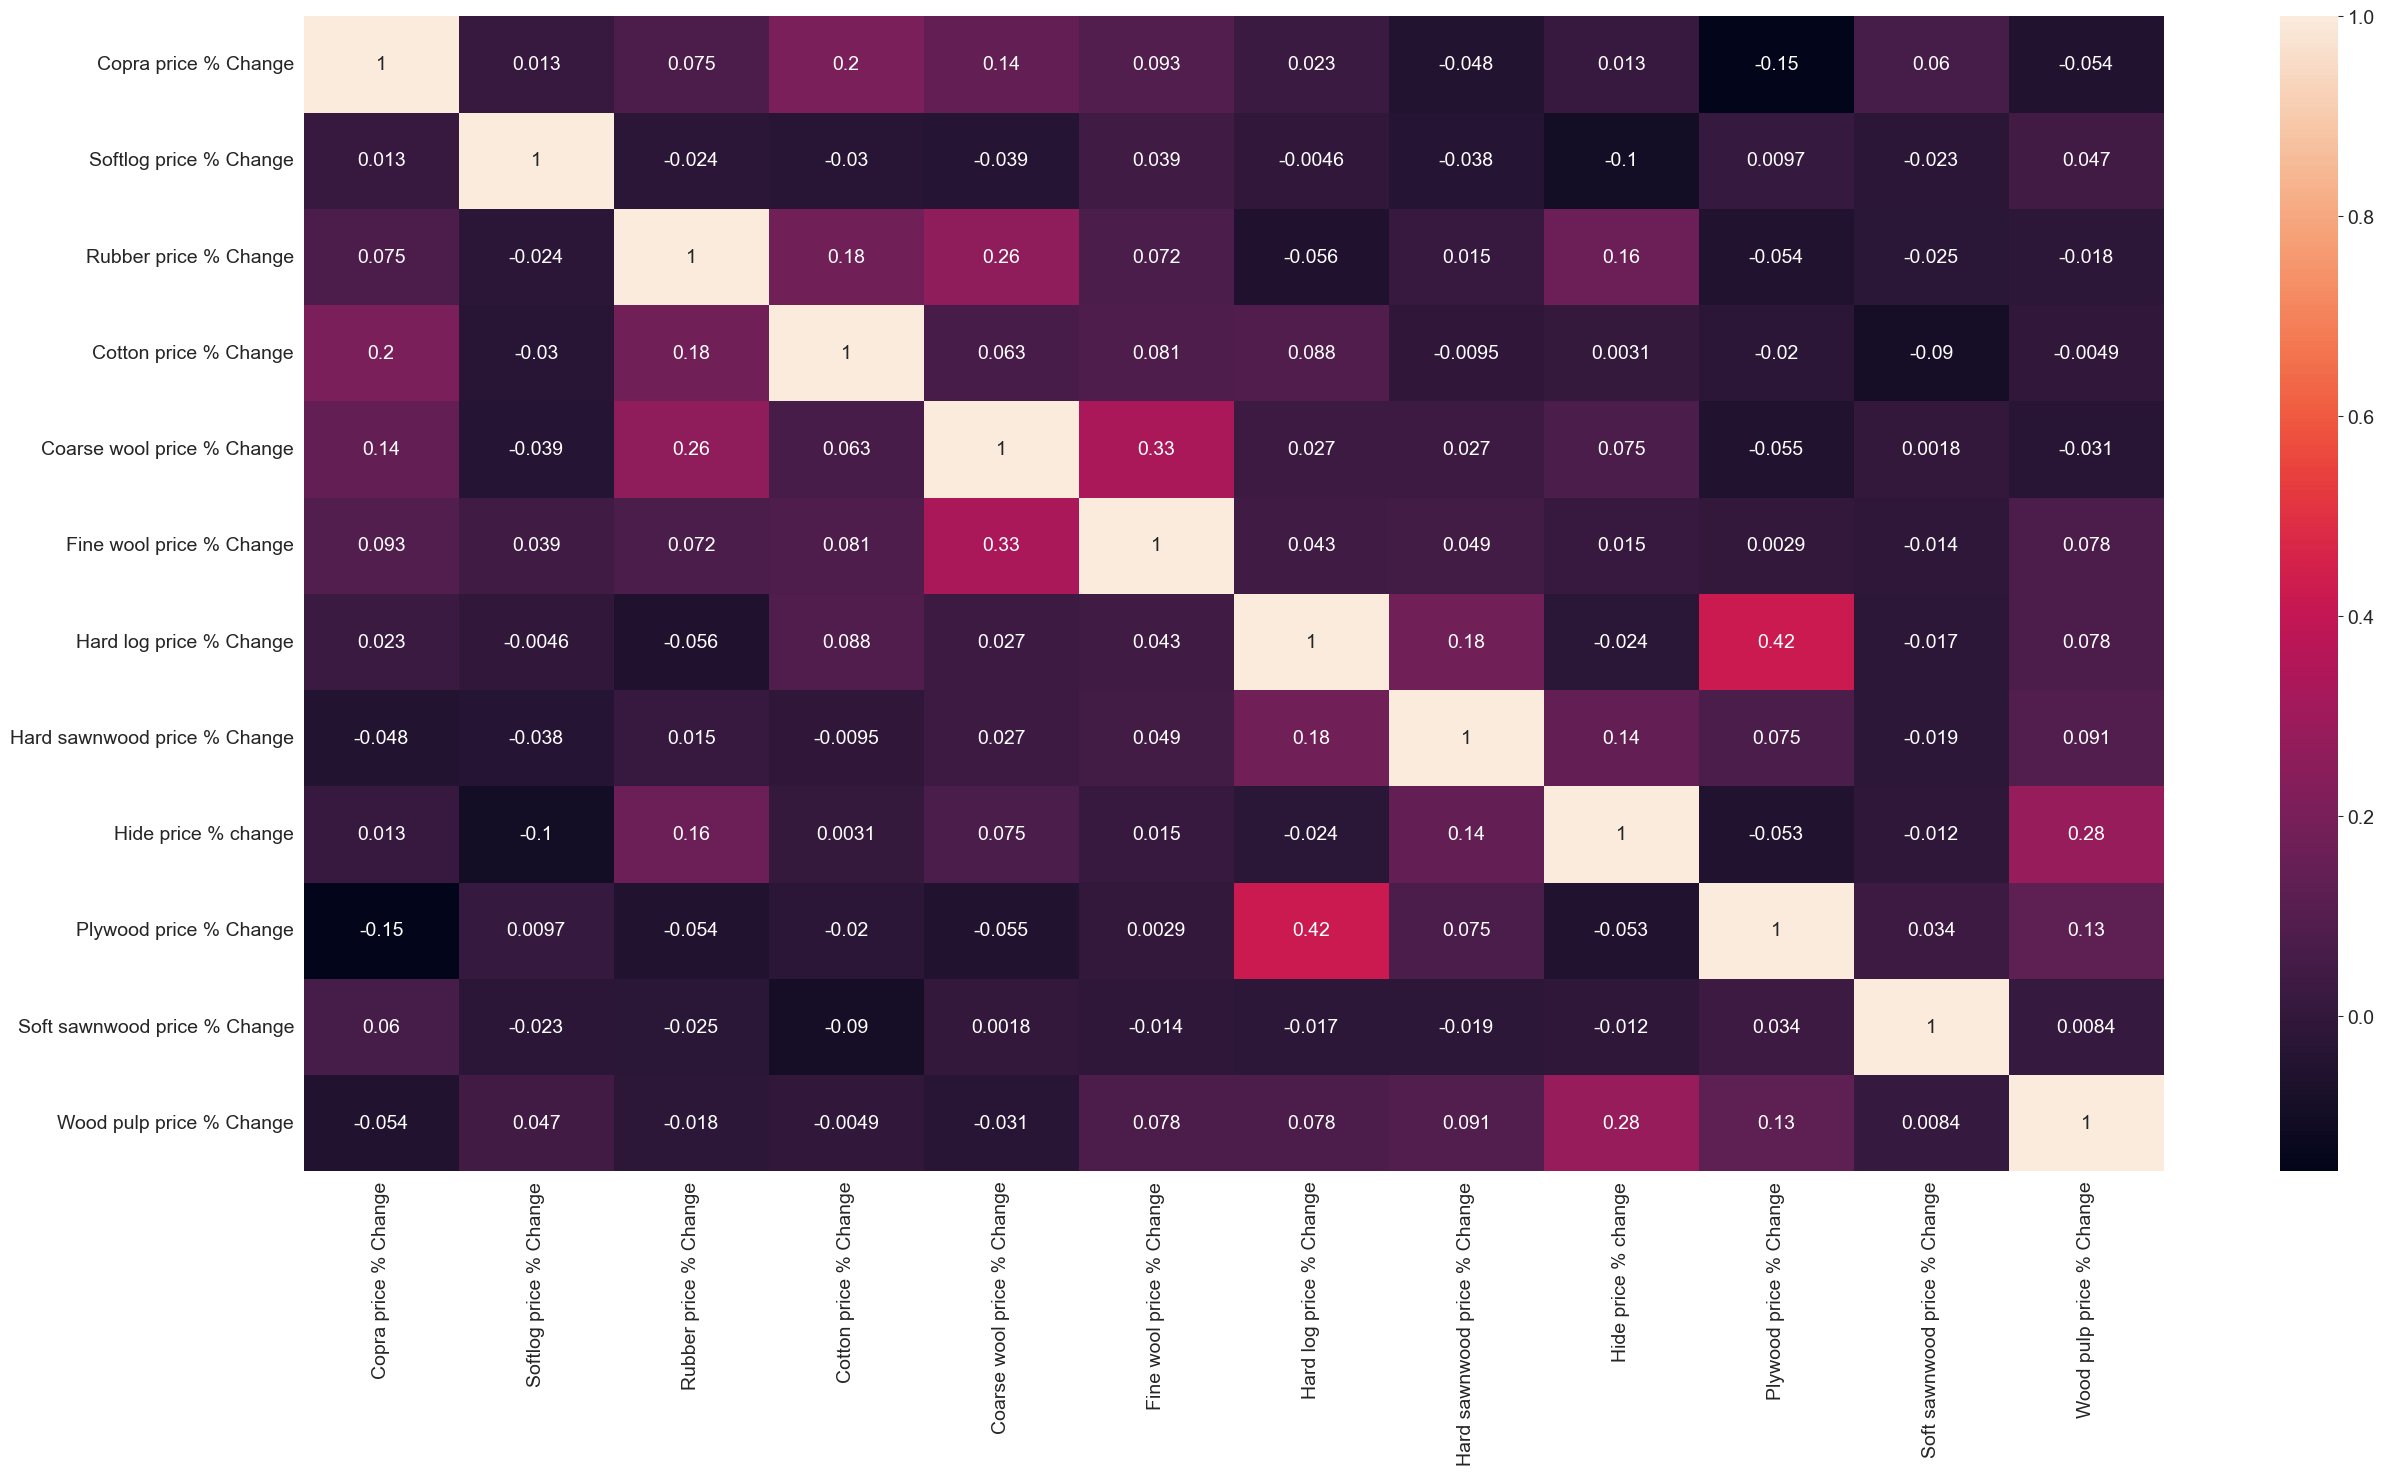

In [12]:
#tamanho do grafico 30 de largura, 15 de altura (em polegadas)
plt.figure(figsize=(30,15))

#seleciona colunas (mudança dos preços em %)
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']

#correlação
corrMatrix = df[changelist].corr()

#(matrizDeCorrelação, valoresDentroDasCelulas)
sns.heatmap(corrMatrix, annot=True)
plt.show()

#como é possível observar, não houve mascara, então o gráfico está espelhado

#### A partir deste gráfico podemos dizer que quase não há relação entre a variação percentual dos preços das matérias-primas

* o valor negativo implica que duas variáveis ​​estão negativamente correlacionadas (um aumento, outro decréscimo)
* Zero implica nenhuma relação
* caso contrário, maior o valor maior a chance de relação. preços e seus gráficos de % de mudança

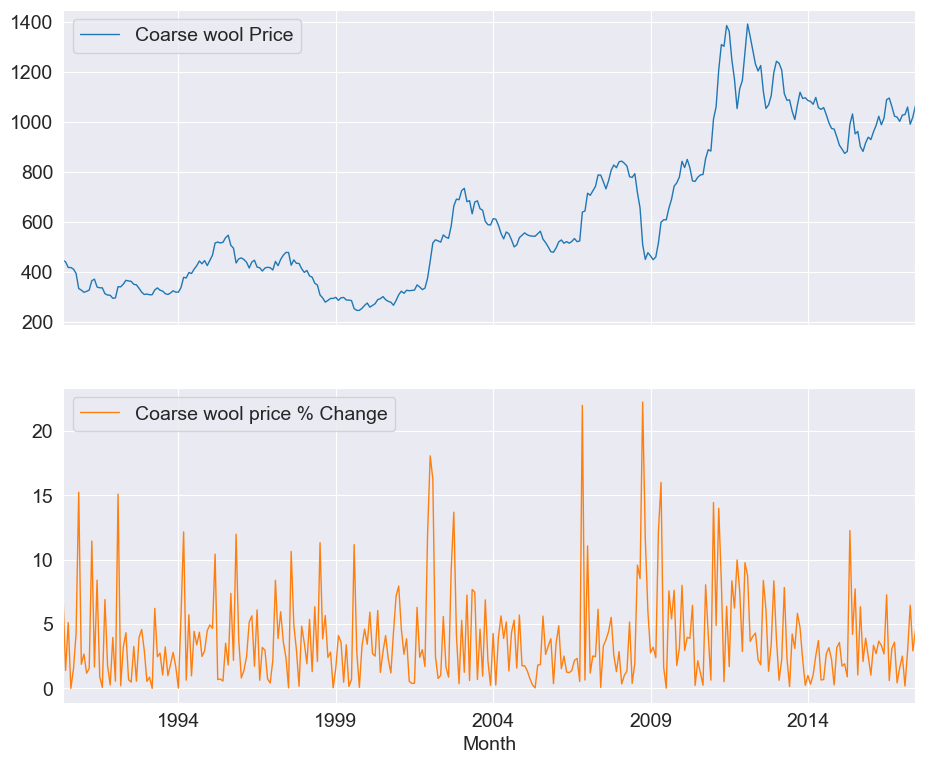

In [23]:
axes=df[["Coarse wool Price", "Coarse wool price % Change"]].plot(figsize=(11, 9), subplots=True, linewidth=1)

#df[["Coarse wool Price", "Coarse wool price % Change"]]: seleciona 2 colunas (Coarse wool Price e Coarse wool price % Change)
#.plot(): Plota as colunas selecionadas do DataFrame como gráficos de linha
#figsize=(11, 9): tamanho da saída gráfica
#subplots=True: ao definir isso como true, cria 2 gráficos separados, ao invvés de tudo em um só
#linewidth=1: espessura da linha
#axes =:  Isso permite que você modifique ou personalize ainda mais cada gráfico individualmente se necessário.

### Fazendo e respondendo perguntas
* A variação normal do preço de cada matéria-prima

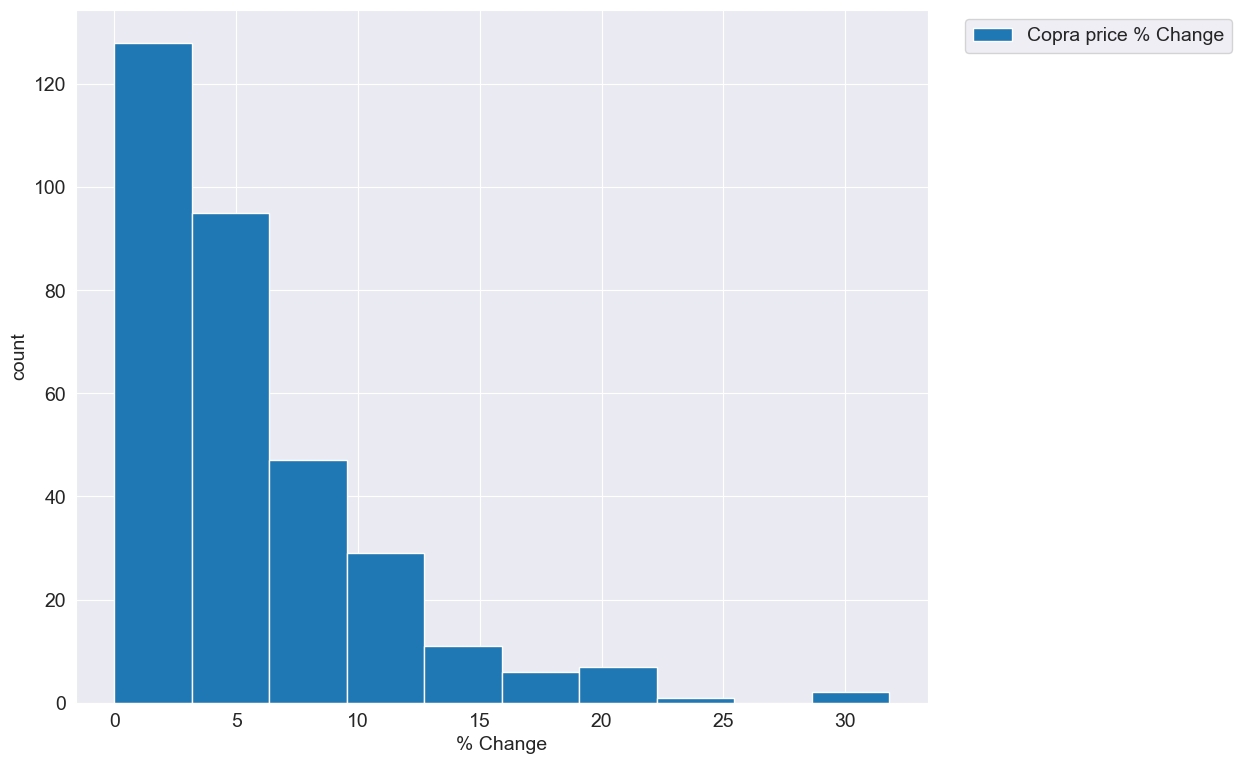

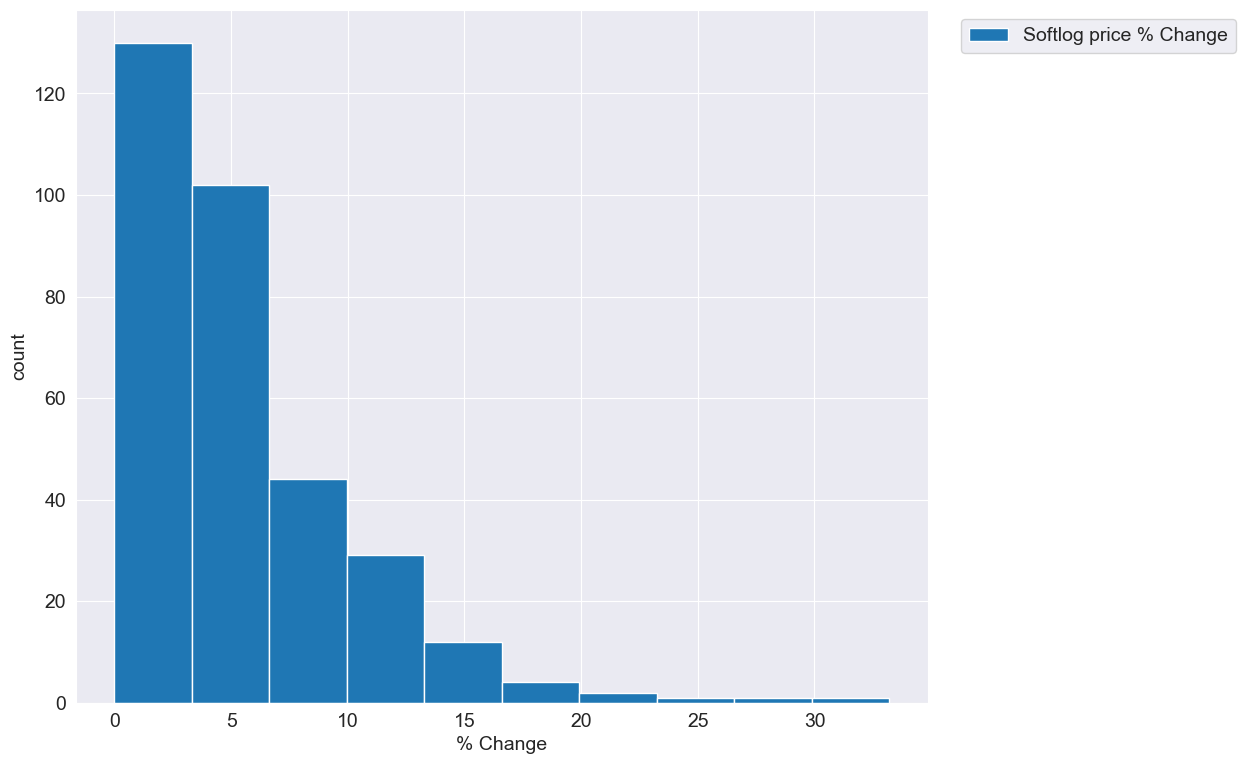

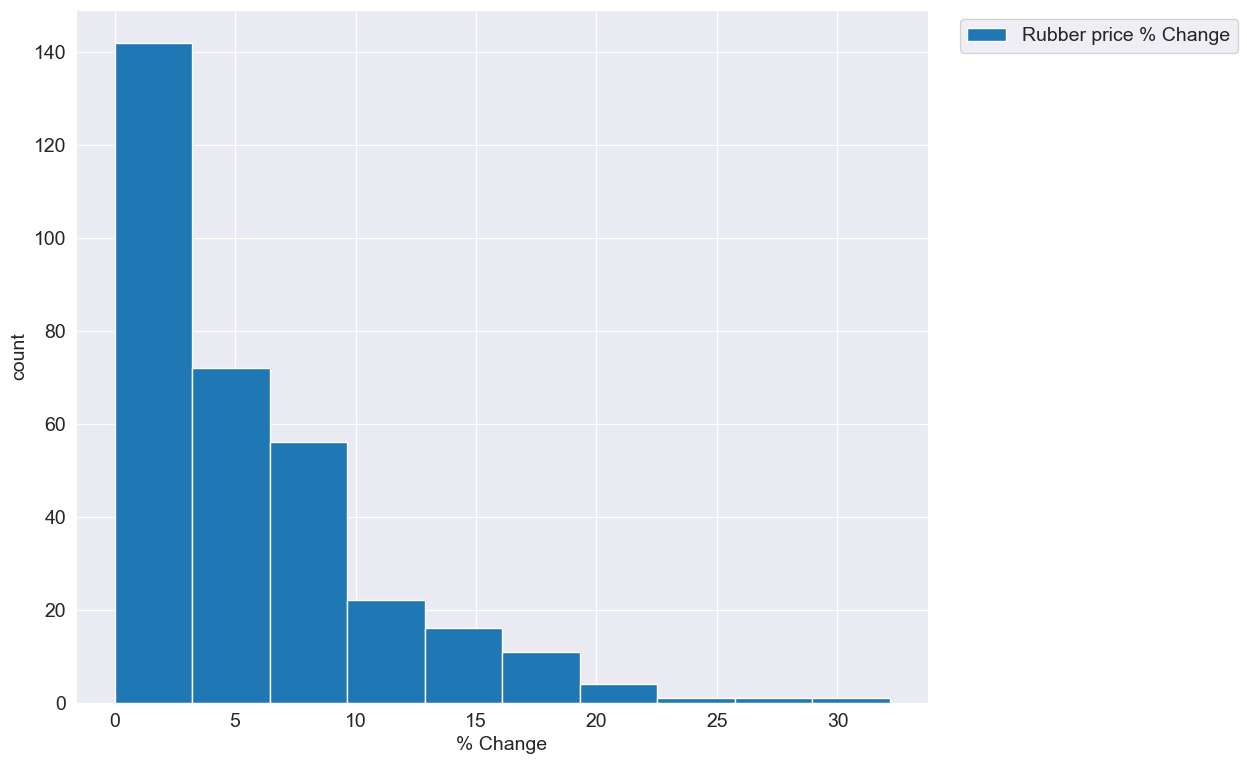

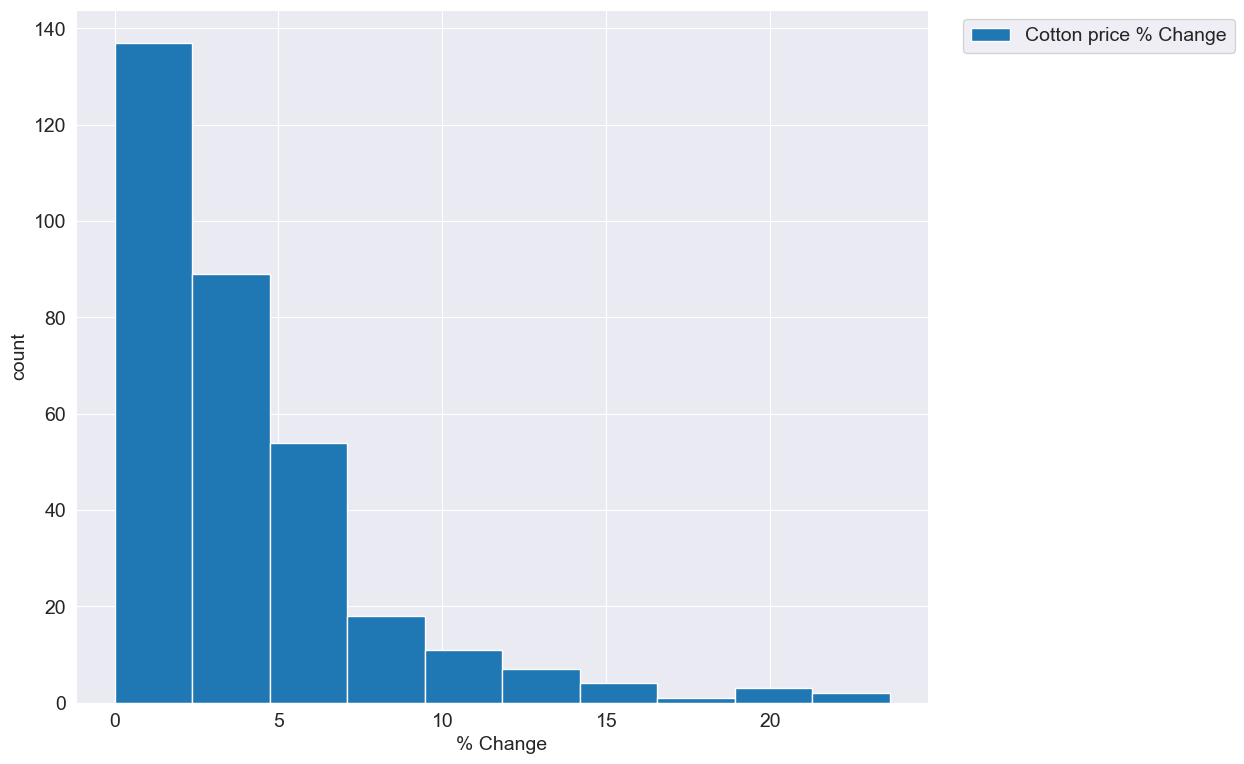

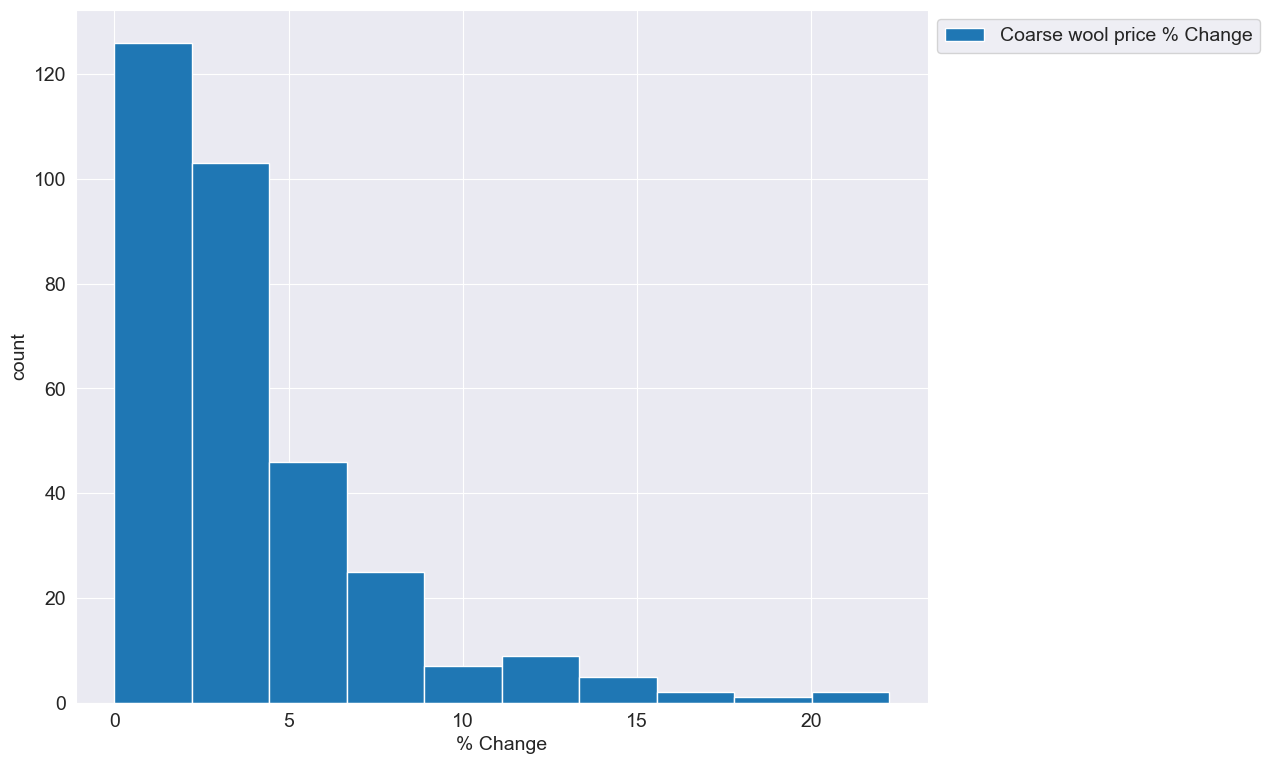

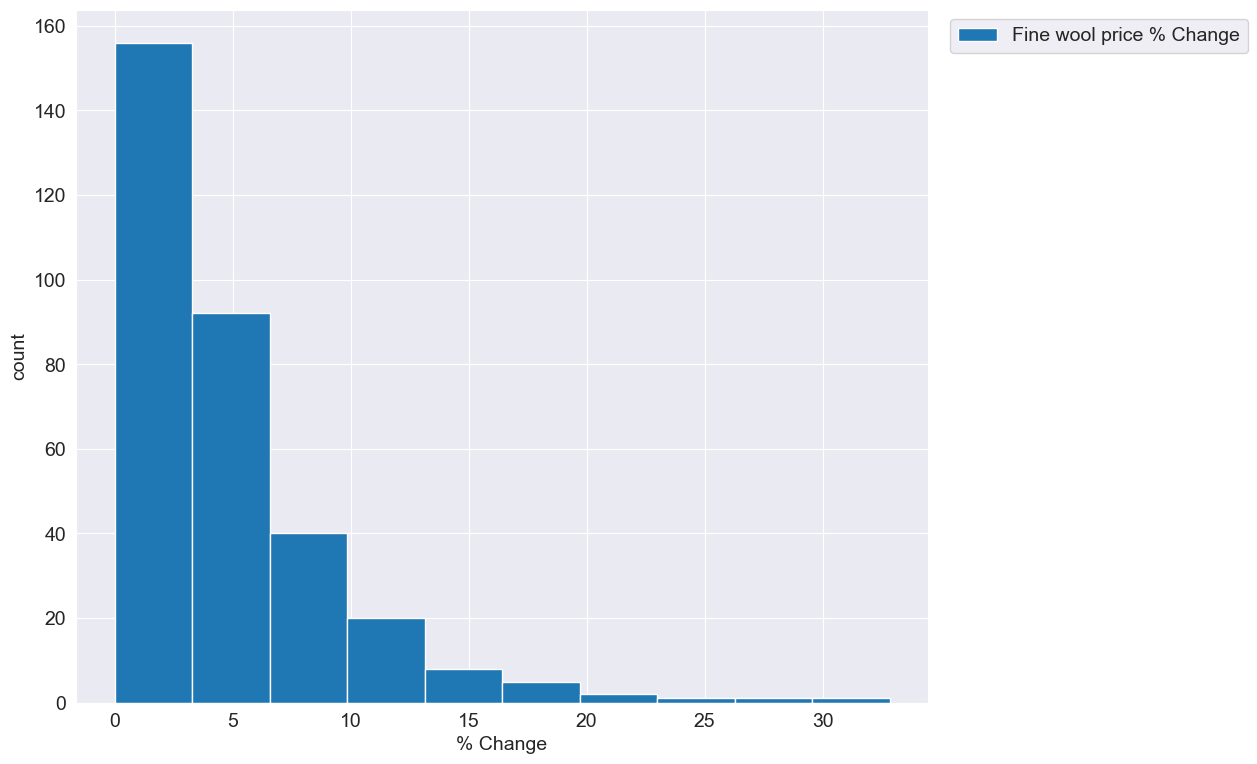

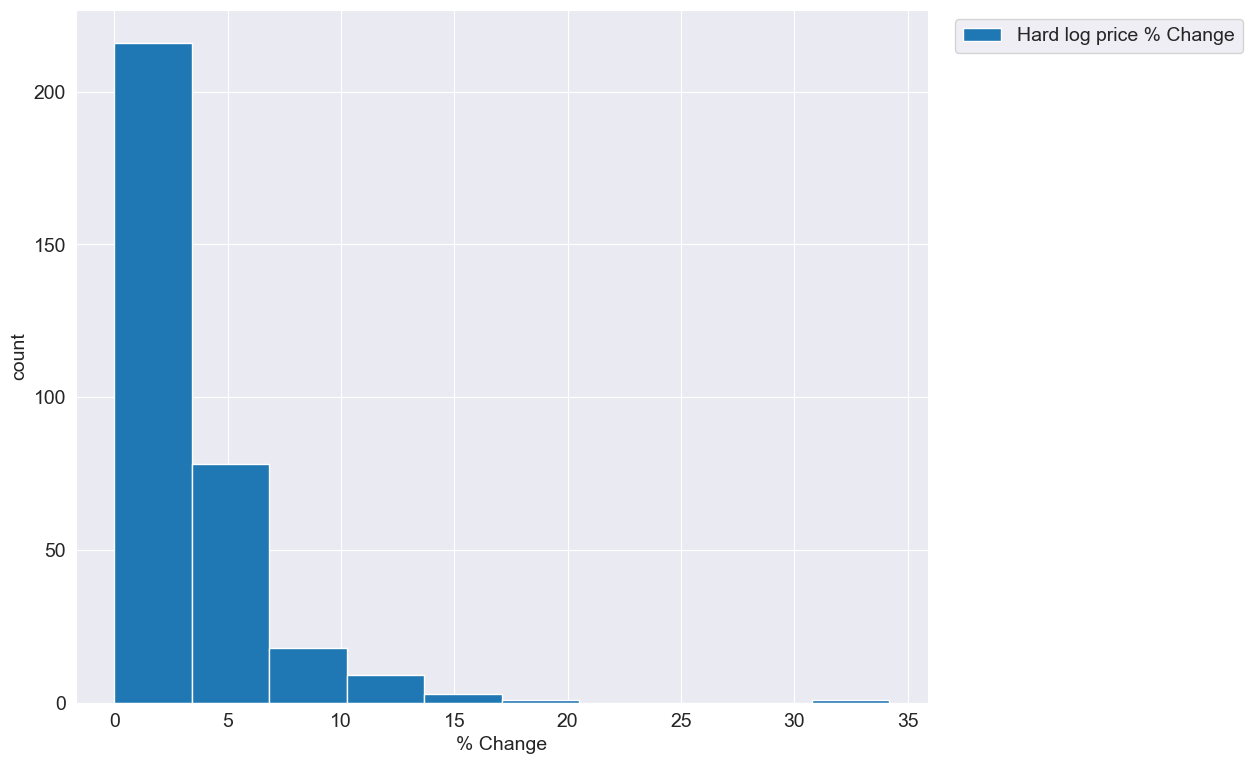

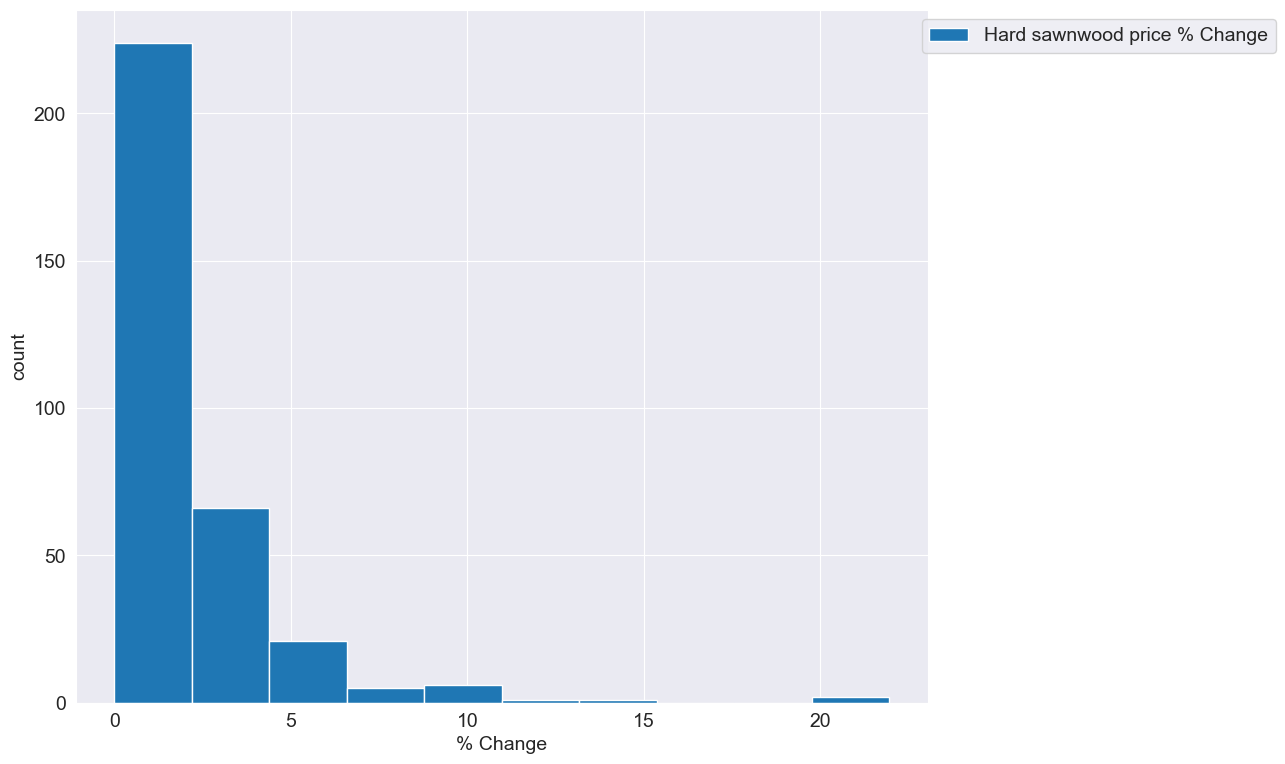

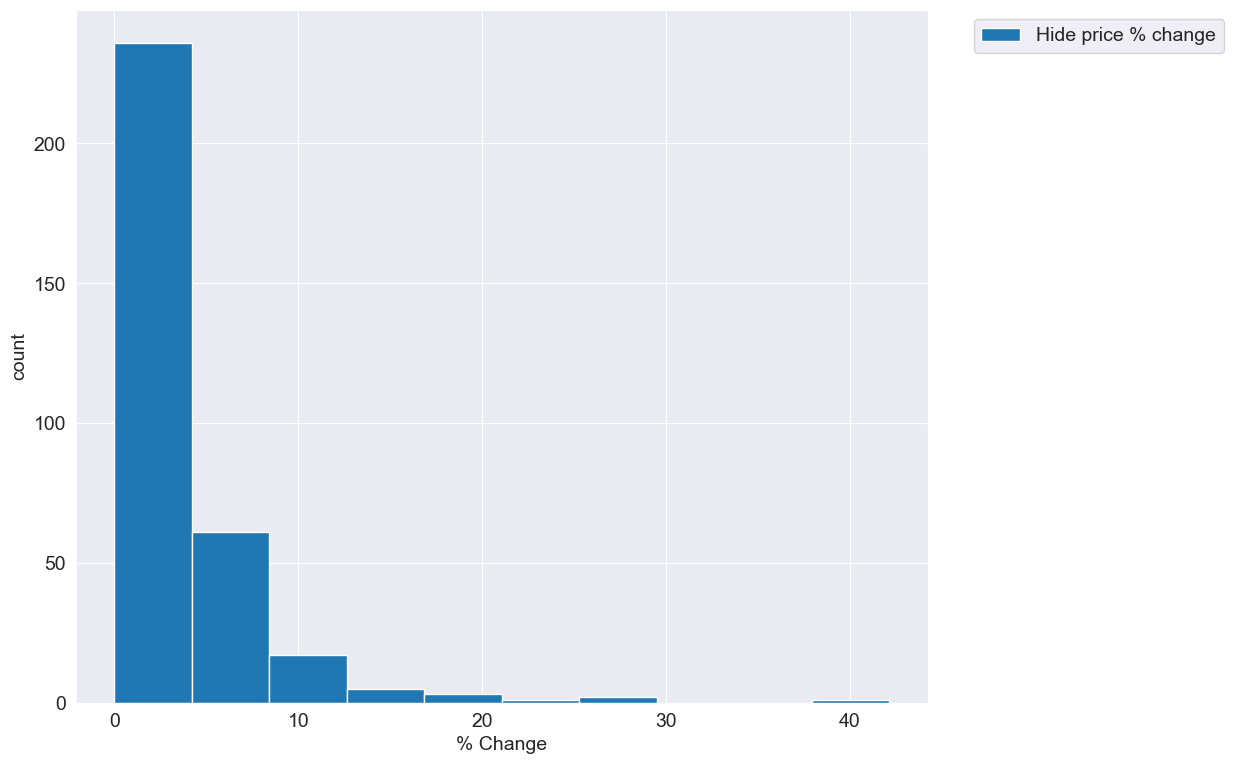

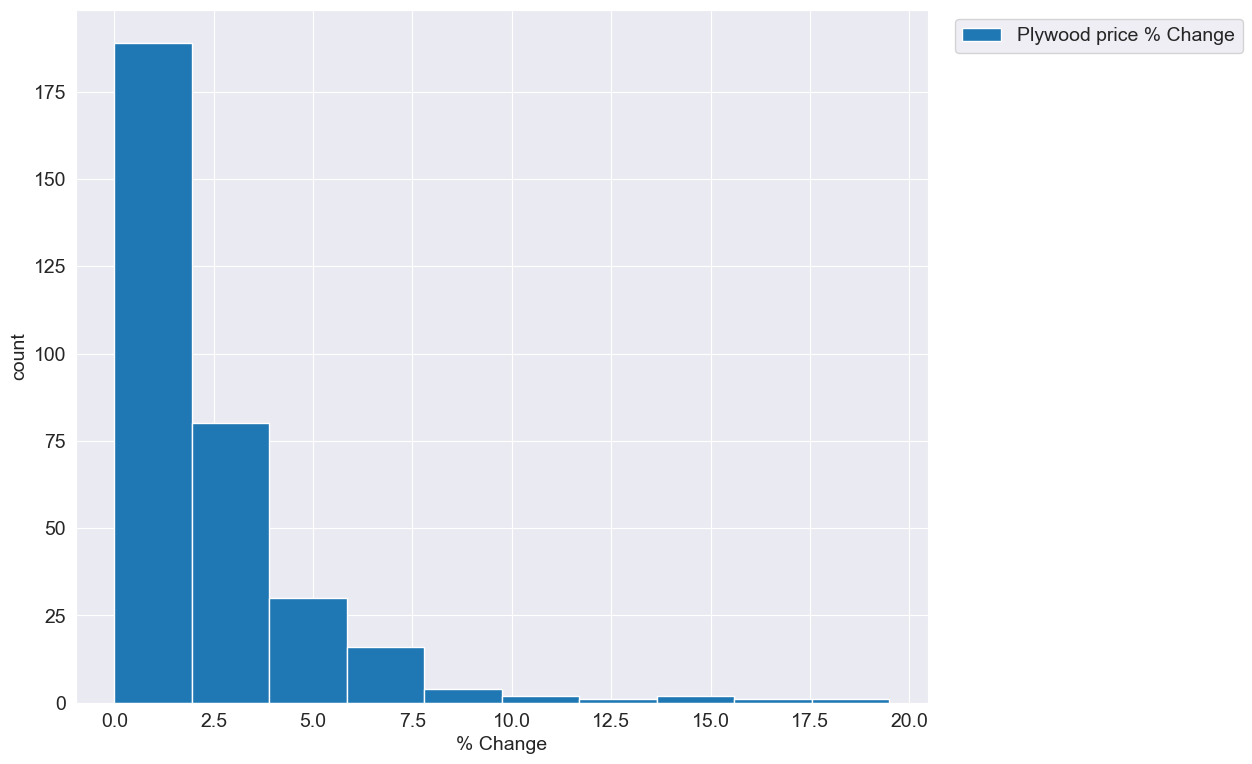

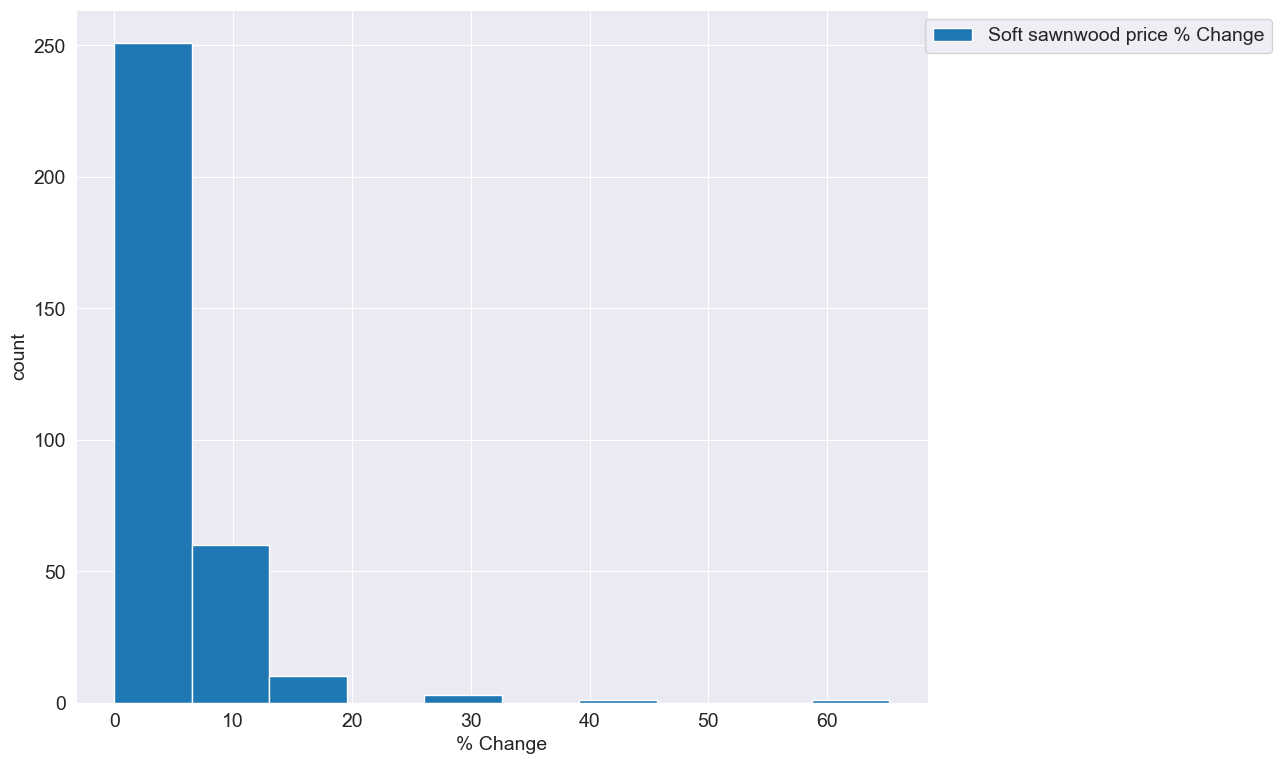

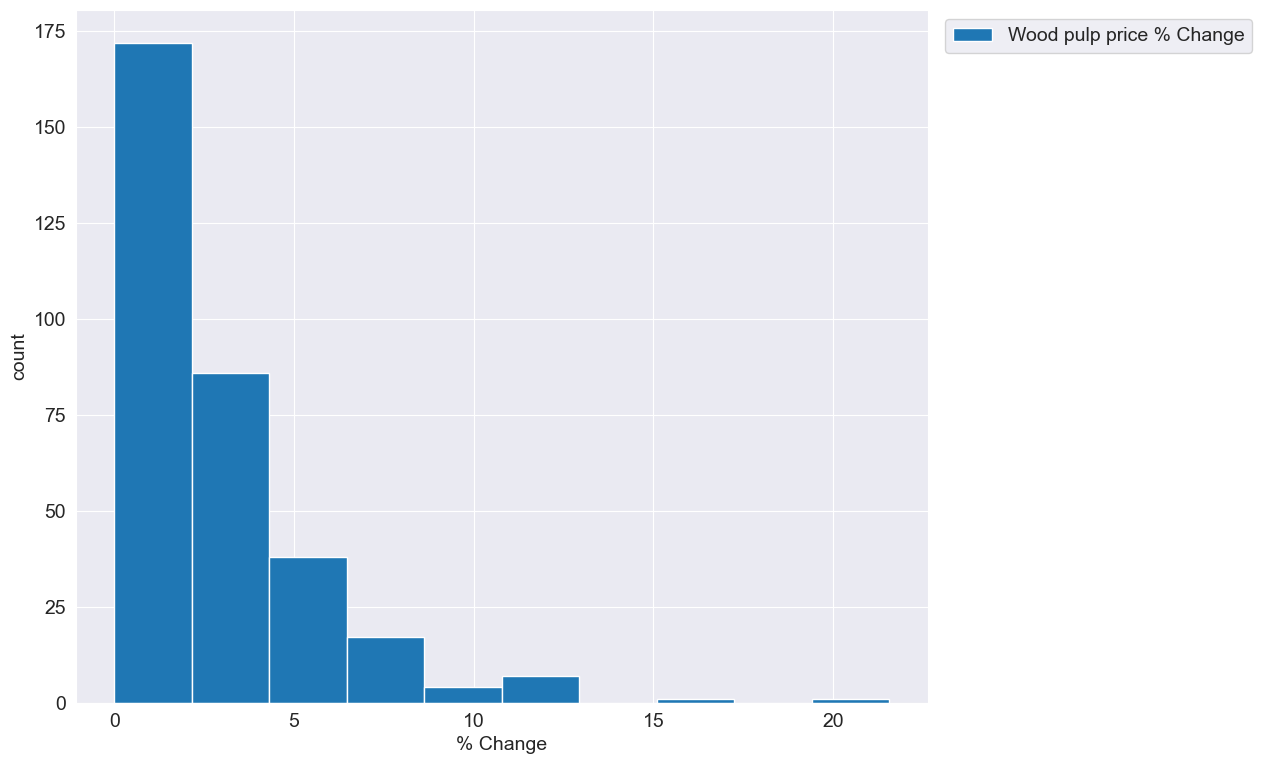

In [25]:
#df[["Wood pulp Price", "Wood pulp price % Change"]].hist(figsize=(11, 9), linewidth=1)
#a linha acima, se ativa, criaria um histograma para as colunas "Wood pulp Price" e "Wood pulp price % Change"

#Essa lista será usada no loop subsequente para gerar histogramas de cada variável na lista.
changelist=['Copra price % Change','Softlog price % Change','Rubber price % Change','Cotton price % Change','Coarse wool price % Change','Fine wool price % Change','Hard log price % Change','Hard sawnwood price % Change','Hide price % change','Plywood price % Change','Soft sawnwood price % Change','Wood pulp price % Change']

for i in range(len(changelist)):
    plt.figure(figsize=(12,12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    
    #nome na horizontal
    plt.xlabel('% Change')

    #nome na vertical
    plt.ylabel('count')

    #ajusta a legenda no gráfico
    plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))

* A matéria-prima que tem o menor preço ao longo dos anos

Text(0.5, 0.98, 'Raw-Materials price comparision')

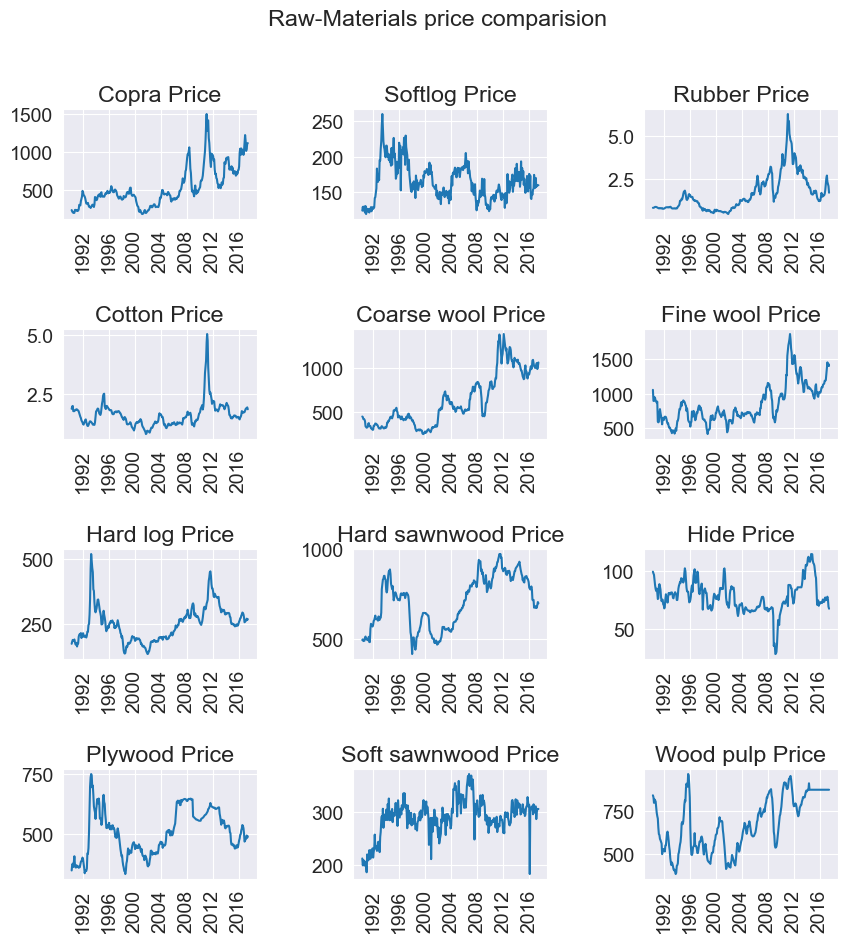

In [15]:
#tamanho dos subgrafos
plt.figure(figsize=(10, 10))

#lista de variaveis
materialslist=['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']

#loop para gerar um grafo por variavel
for i in range(len(materialslist)):
    #coloca o mini grafo em um dos 12 subplots (altura, lateral, posição)
    plt.subplot(4,3,i+1)
    #espaçamento entre subplots
    plt.subplots_adjust( hspace=1 ,wspace=0.5)
    #adiciona titulo
    plt.title(materialslist[i])
    #geração do gráfico de linha
    plt.plot(df[materialslist[i]])
    #coloca os nomes do eixo x (os anos) em 90º
    plt.xticks(rotation=90)

#titulo geral
plt.suptitle("Raw-Materials price comparision")

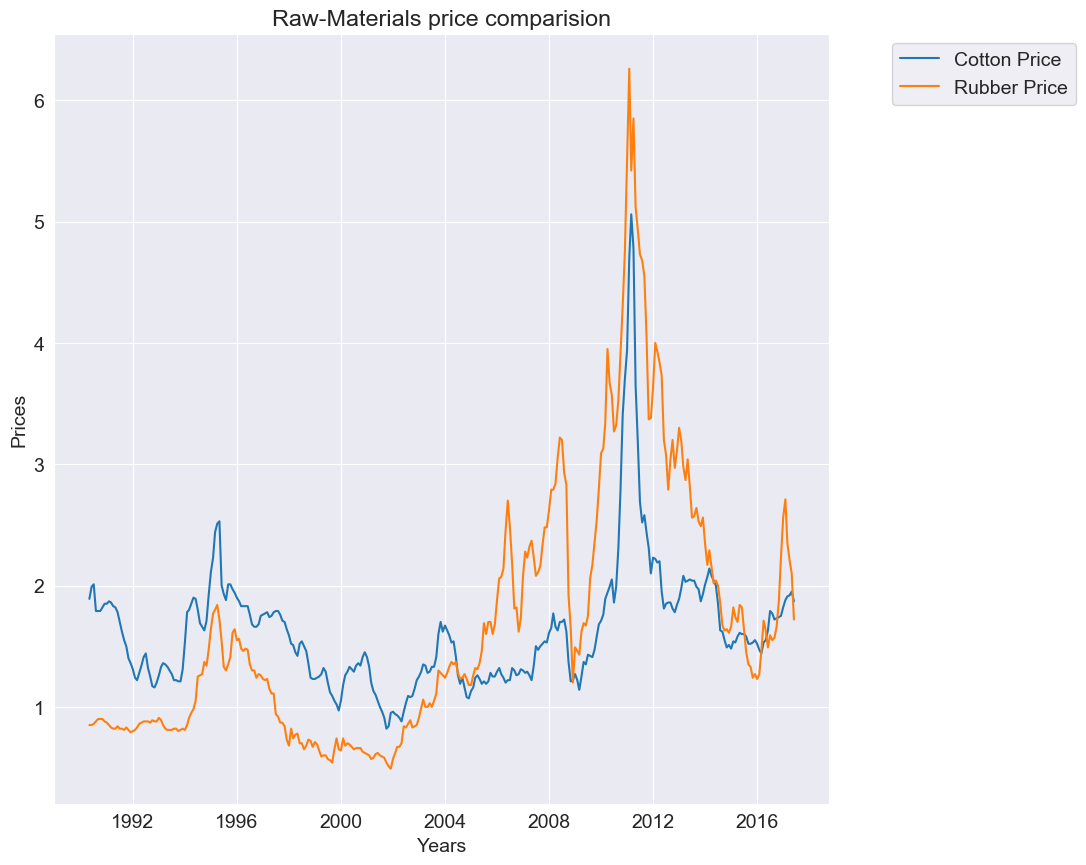

In [16]:
#tamanho do grafo
plt.figure(figsize=(10, 10))

#Cria gráficos de linha para duas variáveis de preço diferentes
plt.plot(df[['Cotton Price','Rubber Price']])

#titulo
plt.title("Raw-Materials price comparision")

#nome eixo x
plt.xlabel('Years')
#nome eixo y
plt.ylabel('Prices')

#aquele quadro na direita do grafico
plt.legend(['Cotton Price','Rubber Price'],loc='upper center',bbox_to_anchor=(1.2,1))

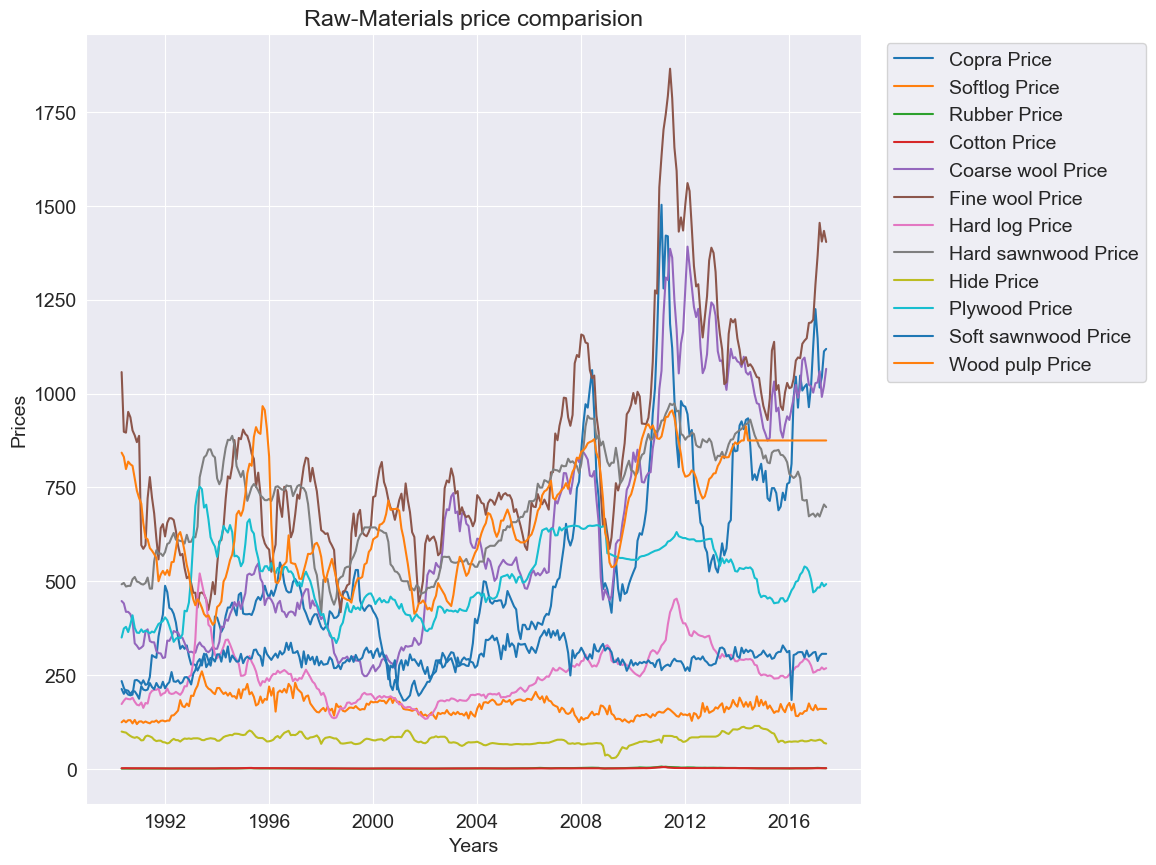

In [17]:
plt.figure(figsize=(10, 10))

#plota as seguintes colunas:
plt.plot(df[['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price']])

#titulo
plt.title("Raw-Materials price comparision")

#eixos
plt.xlabel('Years')
plt.ylabel('Prices')

#quadro na direita do grafico
plt.legend(['Copra Price','Softlog Price','Rubber Price','Cotton Price','Coarse wool Price','Fine wool Price','Hard log Price','Hard sawnwood Price','Hide Price','Plywood Price','Soft sawnwood Price','Wood pulp Price'],loc='upper center',bbox_to_anchor=(1.2,1))

* A matéria-prima que tem a maior e menor variação de % de preço

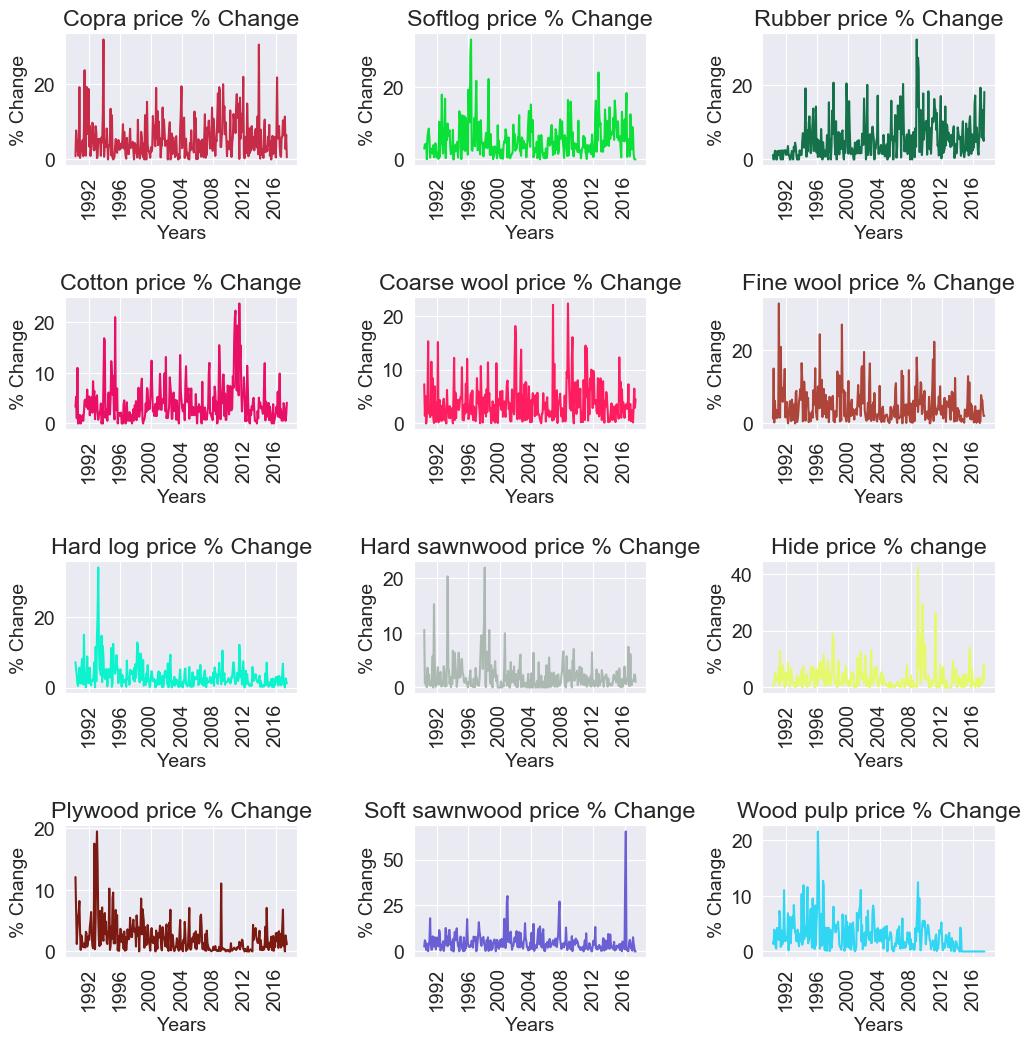

In [28]:
import random as random

#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
#se ativada, pode ser usada para armazenar uma lista de variáveis específicas a serem plotadas.

plt.figure(figsize=(12,12))
for i in range(len(changelist)):
   
    #gera cores diferentes para cada sub grafico
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)

    #determina a posição do subplot
    plt.subplot(4,3,i+1)

    #espaçamento entre subplots
    plt.subplots_adjust( hspace=1 ,wspace=0.5)

    #cria o subplot determinando sua cor (a variavel color)
    plt.plot(df[changelist[i]],c=color)

    #anos na vertical, titulo do subgrafo + subtitulos dos eixos
    plt.xticks(rotation=90)
    plt.title(changelist[i])
    plt.xlabel('Years')
    plt.ylabel('% Change')

    #plt.legend(changelist[i:],loc='upper center',bbox_to_anchor=(1.2,1))
    #se ativada, serviria para mostrar uma legenda que identifica a variável de cada linha (spoiler: não vai caber).

* As matérias-primas com mudança drástica de preço

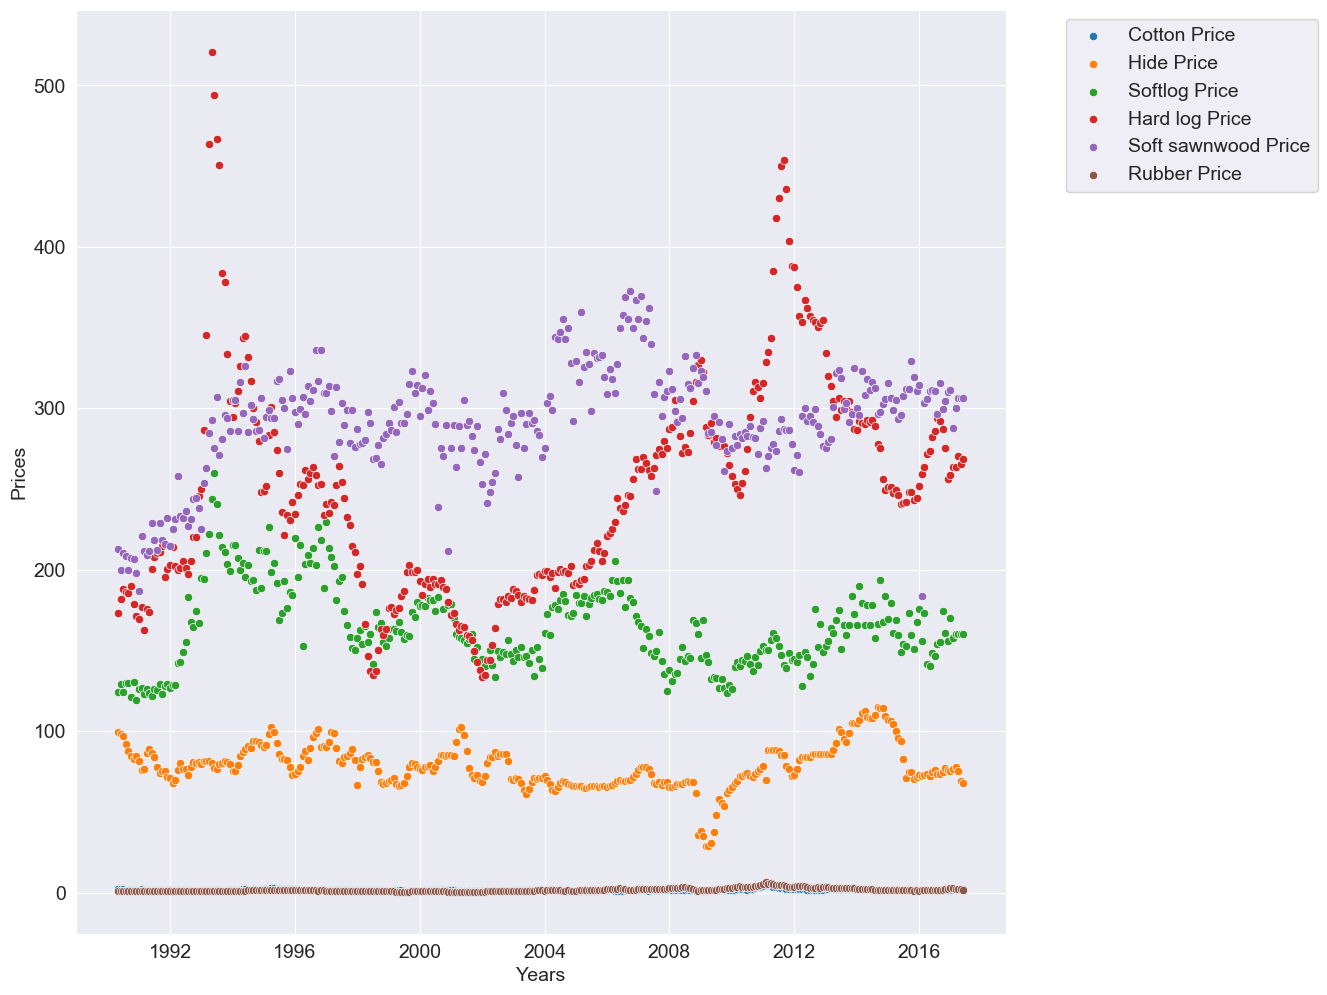

In [33]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#Se ativada, essa linha geraria um gráfico de dispersão, mostrando a relação entre os preços do algodão e os anos, com as cores dos pontos baseadas no preço da lã fina

lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
plt.figure(figsize=(12,12))
plt.ylabel('Prices')
plt.xlabel('Years')

#plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))
#Se ativada, a legenda ajudaria a identificar quais variáveis estão representadas no gráfico.

for i in range(len(lowlist)):
    #Gera um gráfico de dispersão para cada variável de preço, mostrando a relação entre o preço da matéria-prima e os anos
    sns.scatterplot(y=df[lowlist[i]],x=df.index);

    #legenda na direita do grafico
    plt.legend(lowlist,loc='upper center',bbox_to_anchor=(1.2,1))

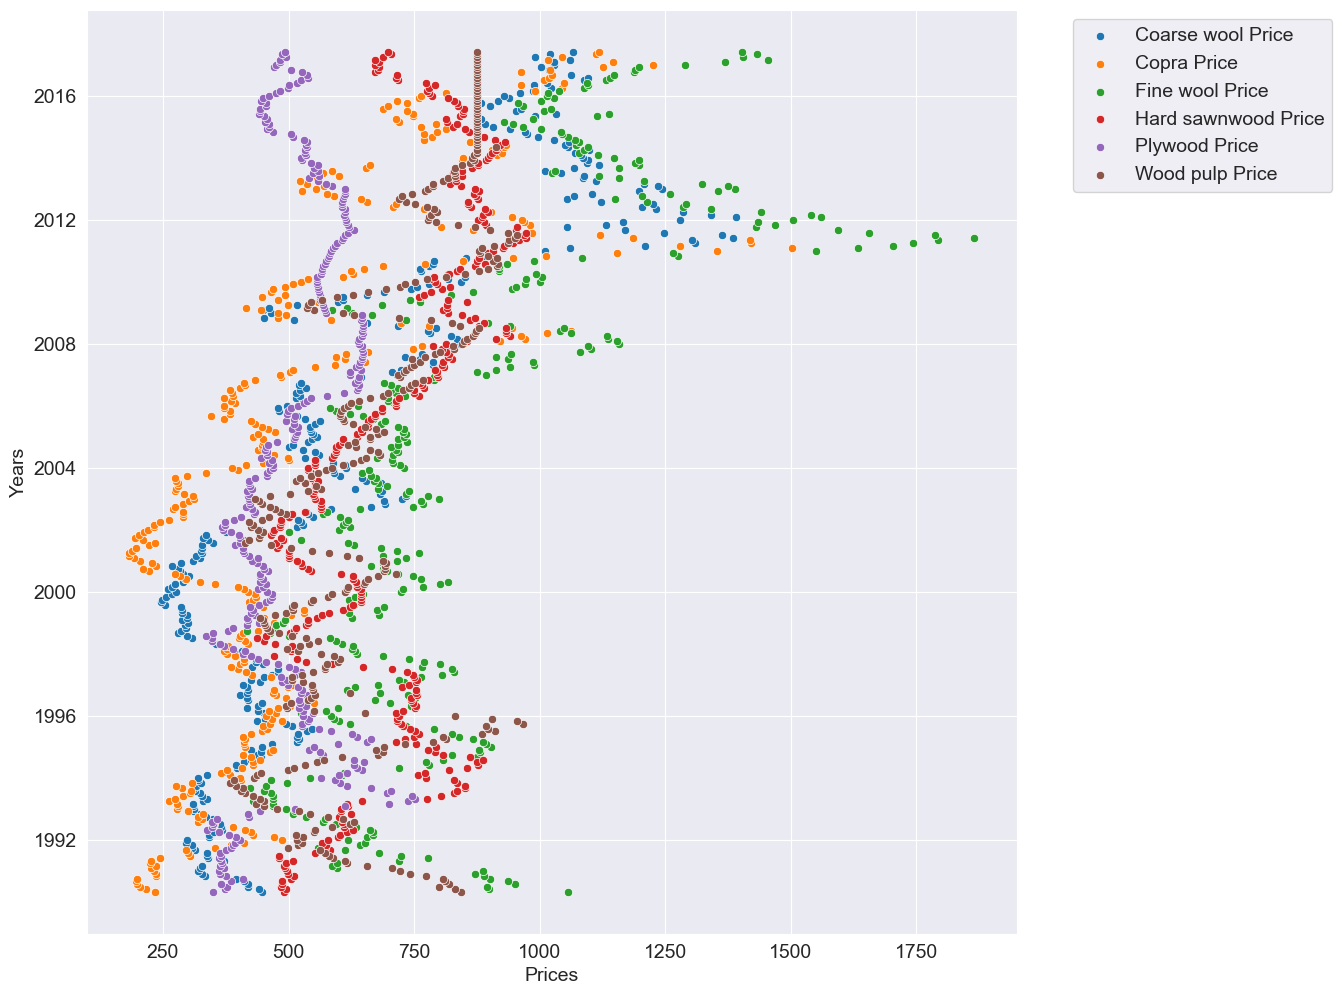

In [20]:
#plt.figure(figsize=(12,12))
#sns.scatterplot(df['Cotton Price'],df.index,hue=df['Fine wool Price']);
#Se ativada, essa linha geraria um gráfico de dispersão mostrando a relação entre os preços do algodão e o tempo (índice)
#lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Plywood Price']
#Se ativada, essa lista seria usada para plotar gráficos de preços mais baixos

highlist=['Coarse wool Price','Copra Price','Fine wool Price','Hard sawnwood Price','Plywood Price','Wood pulp Price']
#lowchangelist=['Cotton price % Change','Hide price % change','Softlog price % Change','Hard log price % Change','Soft sawnwood price % Change','Plywood price % Change']
#Se ativada, essa lista seria usada para plotar mudanças percentuais em preços mais baixos.

plt.figure(figsize=(12,12))
plt.xlabel('Prices')
plt.ylabel('Years')
for i in range(len(highlist)):
    sns.scatterplot(x=df[highlist[i]],y=df.index);
    plt.legend(highlist,loc='upper center',bbox_to_anchor=(1.2,1))
#mostra a relação entre o preço da matéria-prima e o tempo (anos)

* A faixa de preço de matérias-primas de baixo preço

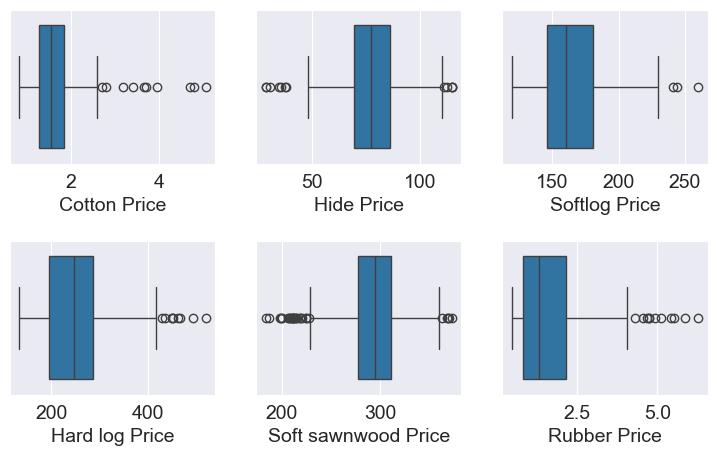

In [21]:
#plt.figure(figsize=(10, 10))
lowlist=['Cotton Price','Hide Price','Softlog Price','Hard log Price','Soft sawnwood Price','Rubber Price']
for i in range(6):
    #plt.title(lowlist[i])
    #Se ativada, essa linha adicionaria um título a cada subplot correspondente ao nome da variável da lista
    
    #permite desenhar vários gráficos na mesma figura, posicionando cada boxplot em uma das 6 células da grade 2x3 (2 linhas, 3 colunas).
    plt.subplot(2, 3, i+1)

    #espaçamento entre subplots
    plt.subplots_adjust( hspace=0.5 )

    #Gera um gráfico de boxplot, que mostra a distribuição estatística da variável de preços selecionada, incluindo a mediana, quartis e possíveis valores atípicos (outliers).
    sns.boxplot(x=df[lowlist[i]])